<a href="https://colab.research.google.com/github/RylleLang/MANTARING_RYLLE_AIRO_CPE311N/blob/main/Linear_Regression_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install ucimlrepo

In [ ]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
automobile = fetch_ucirepo(id=10)

# data (as pandas dataframes)
X = automobile.data.features
y = automobile.data.targets

# metadata
print(automobile.metadata)

# variable information
print(automobile.variables)


{'uci_id': 10, 'name': 'Automobile', 'repository_url': 'https://archive.ics.uci.edu/dataset/10/automobile', 'data_url': 'https://archive.ics.uci.edu/static/public/10/data.csv', 'abstract': "From 1985 Ward's Automotive Yearbook", 'area': 'Other', 'tasks': ['Regression'], 'characteristics': ['Multivariate'], 'num_instances': 205, 'num_features': 25, 'feature_types': ['Categorical', 'Integer', 'Real'], 'demographics': [], 'target_col': ['symboling'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 1985, 'last_updated': 'Thu Aug 10 2023', 'dataset_doi': '10.24432/C5B01C', 'creators': ['Jeffrey Schlimmer'], 'intro_paper': None, 'additional_info': {'summary': 'This data set consists of three types of entities: (a) the specification of an auto in terms of various characteristics, (b) its assigned insurance risk rating, (c) its normalized losses in use as compared to other cars.  The second rating corresponds to the degree to which th

In [ ]:
X.head()

,price,highway-mpg,city-mpg,peak-rpm,horsepower,compression-ratio,stroke,bore,fuel-system,engine-size,...,length,wheel-base,engine-location,drive-wheels,body-style,num-of-doors,aspiration,fuel-type,make,normalized-losses
0,13495.0,27,21,5000.0,111.0,9.0,2.68,3.47,mpfi,130,...,168.8,88.6,front,rwd,convertible,2.0,std,gas,alfa-romero,NaN
1,16500.0,27,21,5000.0,111.0,9.0,2.68,3.47,mpfi,130,...,168.8,88.6,front,rwd,convertible,2.0,std,gas,alfa-romero,NaN
2,16500.0,26,19,5000.0,154.0,9.0,3.47,2.68,mpfi,152,...,171.2,94.5,front,rwd,hatchback,2.0,std,gas,alfa-romero,NaN
3,13950.0,30,24,5500.0,102.0,10.0,3.40,3.19,mpfi,109,...,176.6,99.8,front,fwd,sedan,4.0,std,gas,audi,164.0
4,17450.0,22,18,5500.0,115.0,8.0,3.40,3.19,mpfi,136,...,176.6,99.4,front,4wd,sedan,4.0,std,gas,audi,164.0


In [ ]:
X.dtypes

price                float64
highway-mpg            int64
city-mpg               int64
peak-rpm             float64
horsepower           float64
compression-ratio    float64
stroke               float64
bore                 float64
fuel-system           object
engine-size            int64
num-of-cylinders       int64
engine-type           object
curb-weight            int64
height               float64
width                float64
length               float64
wheel-base           float64
engine-location       object
drive-wheels          object
body-style            object
num-of-doors         float64
aspiration            object
fuel-type             object
make                  object
normalized-losses    float64
dtype: object

In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 25 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   price              201 non-null    float64
 1   highway-mpg        205 non-null    int64  
 2   city-mpg           205 non-null    int64  
 3   peak-rpm           203 non-null    float64
 4   horsepower         203 non-null    float64
 5   compression-ratio  205 non-null    float64
 6   stroke             201 non-null    float64
 7   bore               201 non-null    float64
 8   fuel-system        205 non-null    object 
 9   engine-size        205 non-null    int64  
 10  num-of-cylinders   205 non-null    int64  
 11  engine-type        205 non-null    object 
 12  curb-weight        205 non-null    int64  
 13  height             205 non-null    float64
 14  width              205 non-null    float64
 15  length             205 non-null    float64
 16  wheel-base         205 non

In [ ]:
X.isnull().sum()

price                 4
highway-mpg           0
city-mpg              0
peak-rpm              2
horsepower            2
compression-ratio     0
stroke                4
bore                  4
fuel-system           0
engine-size           0
num-of-cylinders      0
engine-type           0
curb-weight           0
height                0
width                 0
length                0
wheel-base            0
engine-location       0
drive-wheels          0
body-style            0
num-of-doors          2
aspiration            0
fuel-type             0
make                  0
normalized-losses    41
dtype: int64

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


In [ ]:
print(X.head())
print(y.head())

     price  highway-mpg  city-mpg  peak-rpm  horsepower  compression-ratio  \
0  13495.0           27        21    5000.0       111.0                9.0   
1  16500.0           27        21    5000.0       111.0                9.0   
2  16500.0           26        19    5000.0       154.0                9.0   
3  13950.0           30        24    5500.0       102.0               10.0   
4  17450.0           22        18    5500.0       115.0                8.0   

   stroke  bore  engine-size  num-of-cylinders  ...  make_nissan  make_peugot  \
0    2.68  3.47          130                 4  ...        False        False   
1    2.68  3.47          130                 4  ...        False        False   
2    3.47  2.68          152                 6  ...        False        False   
3    3.40  3.19          109                 4  ...        False        False   
4    3.40  3.19          136                 5  ...        False        False   

   make_plymouth  make_porsche  make_renault

In [ ]:
#Check for missing values
print(X.isnull().sum())
print(y.isnull().sum())

numerical_cols = X.select_dtypes(include=[np.number]).columns
categorical_cols = X.select_dtypes(include=[object]).columns

# Fill missing numerical values with the median
for col in numerical_cols:
    X[col].fillna(X[col].median(), inplace=True)

# Fill missing values
for col in categorical_cols:
    X[col].fillna(X[col].mode()[0], inplace=True)

# Convert to dummy variables
X = pd.get_dummies(X, columns=categorical_cols, drop_first=True)


price                   0
highway-mpg             0
city-mpg                0
peak-rpm                0
horsepower              0
compression-ratio       0
stroke                  0
bore                    0
engine-size             0
num-of-cylinders        0
curb-weight             0
height                  0
width                   0
length                  0
wheel-base              0
num-of-doors            0
normalized-losses       0
fuel-system_2bbl        0
fuel-system_4bbl        0
fuel-system_idi         0
fuel-system_mfi         0
fuel-system_mpfi        0
fuel-system_spdi        0
fuel-system_spfi        0
engine-type_dohcv       0
engine-type_l           0
engine-type_ohc         0
engine-type_ohcf        0
engine-type_ohcv        0
engine-type_rotor       0
engine-location_rear    0
drive-wheels_fwd        0
drive-wheels_rwd        0
body-style_hardtop      0
body-style_hatchback    0
body-style_sedan        0
body-style_wagon        0
aspiration_turbo        0
fuel-type_ga

In [ ]:
#Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

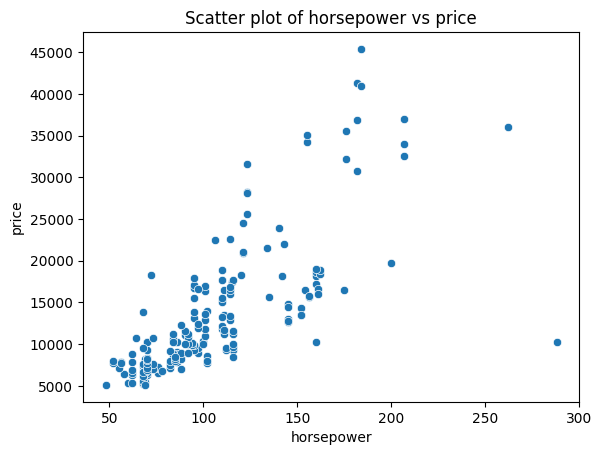

In [ ]:
x_variable = 'horsepower'  # Variable for x-axis
y_variable = 'price'       # Variable for y-axis

#scatter plot using seaborn
sns.scatterplot(x=X[x_variable], y=X[y_variable])
plt.xlabel(x_variable)
plt.ylabel(y_variable)
plt.title(f'Scatter plot of {x_variable} vs {y_variable}')
plt.show()


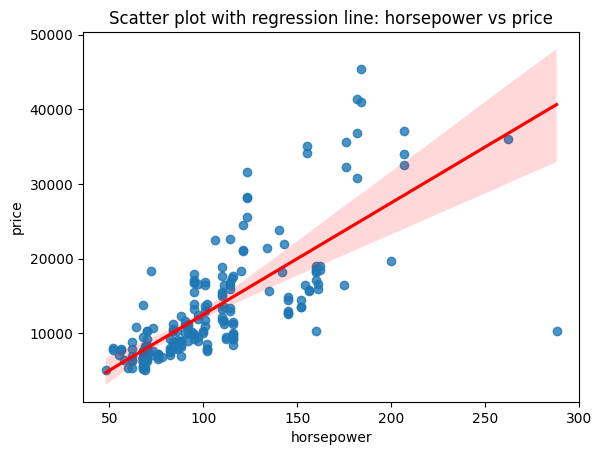

In [ ]:
#scatter plot with a regression line
sns.regplot(x=X[x_variable], y=X[y_variable], scatter=True, line_kws={"color": "red"})

plt.xlabel(x_variable)
plt.ylabel(y_variable)
plt.title(f'Scatter plot with regression line: {x_variable} vs {y_variable}')
plt.show()


# We can determin that the horsepower affect the price of a car because when a low horse power car it gets a low value price and when it get more horse power in become a pricy one